# Importing Libraries

In [9]:
import pandas as pd
import numpy as np

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
from sklearn.preprocessing import OneHotEncoder

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [14]:
import matplotlib.pyplot as plt

In [15]:
from sklearn.metrics import classification_report
from sklearn import metrics

# Reading Dataset

In [16]:
Dataset = pd.read_csv("/content/drive/MyDrive/Project/DataSet/Features_Combined.csv")

In [17]:
Dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,139,140,141,142,143,144,145,146,147,labels
0,0.000056,0.000195,0.000281,0.000119,0.000119,0.003826,0.215466,0.779309,1.186640,0.456590,...,-11.354362,-7.726419,1.593689,-9.145521,-0.212657,-6.929526,-4.322876,-4.710403,-8.351056,calm
1,0.000203,0.000322,0.000439,0.000271,0.000265,0.003977,0.215628,0.776650,1.184454,0.458336,...,-10.847643,-6.654379,-1.465691,-6.797494,-3.094689,-6.291496,-4.512487,-4.711416,-8.531783,calm
2,0.000012,0.000048,0.000069,0.000038,0.000026,0.000213,0.008568,0.090721,0.256162,0.167146,...,-13.176809,-3.879907,-0.284960,-9.416859,0.278055,-8.788507,-4.630785,-7.198601,-8.594221,calm
3,0.000052,0.000118,0.000180,0.000401,0.000892,0.033079,0.149234,0.258785,0.233824,0.028744,...,-3.513651,-0.170925,-5.336728,1.003468,-3.568468,-5.821103,-3.620392,-4.771007,-3.185519,sad
4,0.000480,0.000538,0.000612,0.000840,0.001356,0.033393,0.147666,0.261492,0.236123,0.028882,...,-3.040922,-2.138857,-3.132770,-1.381131,-2.552100,-4.274347,-2.680576,-4.152612,-3.639899,sad


# Replacing Emotions by values

In [18]:
Dataset = Dataset.replace("calm", 0)
Dataset = Dataset.replace("sad", 1)
Dataset = Dataset.replace("happy", 2)
Dataset = Dataset.replace("neutral", 3)
Dataset = Dataset.replace("angry", 4)
Dataset = Dataset.replace("disgust", 5)
Dataset = Dataset.replace("fear", 6)
Dataset = Dataset.replace("surprise", 7)

#Changing pandas dataframe to numpy array

In [19]:
X = Dataset.iloc[:,:148].values
Y = Dataset.iloc[:,148:].values

In [20]:
X  # Features

array([[ 5.60705848e-05,  1.94506836e-04,  2.81415560e-04, ...,
        -4.32287645e+00, -4.71040344e+00, -8.35105610e+00],
       [ 2.02672456e-04,  3.21870594e-04,  4.39332463e-04, ...,
        -4.51248750e+00, -4.71141584e+00, -8.53178279e+00],
       [ 1.21692983e-05,  4.75329180e-05,  6.92600006e-05, ...,
        -4.63078547e+00, -7.19860077e+00, -8.59422112e+00],
       ...,
       [ 4.63894321e-05,  3.03594774e-04,  1.18483054e-02, ...,
         4.53363991e+00, -5.57978153e+00,  6.27505407e-02],
       [ 6.50331236e-05,  3.16206871e-04,  1.18802942e-02, ...,
         4.18286107e+00, -4.87670749e+00, -3.55554137e-01],
       [ 6.54187716e-06,  3.34603828e-05,  1.99942710e-03, ...,
         2.40215874e+00, -7.08759308e+00, -4.80714273e+00]])

In [21]:
Y  # Labels

array([[0],
       [0],
       [0],
       ...,
       [3],
       [3],
       [3]])

#Normalizing the data

In [22]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [23]:
X

array([[-0.1164991 , -0.10500371, -0.25439544, ..., -0.67023061,
        -0.35519796, -1.49860173],
       [-0.11634414, -0.10198271, -0.24022092, ..., -0.7150842 ,
        -0.3554285 , -1.53760257],
       [-0.1165455 , -0.10848986, -0.27343838, ..., -0.74306827,
        -0.92180967, -1.55107677],
       ...,
       [-0.11650933, -0.1024162 ,  0.78384069, ...,  1.42482956,
        -0.55317253,  0.31709879],
       [-0.11648962, -0.10211705,  0.78671198, ...,  1.34185079,
        -0.39306868,  0.22682859],
       [-0.11655145, -0.10882365, -0.1001879 , ...,  0.92061536,
        -0.89653102, -0.73382479]])

# One-Hot Encoding

In [24]:
ohe = OneHotEncoder()
Y = ohe.fit_transform(Y).toarray()

In [25]:
Y

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# Train-Test Split

In [26]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2)

# Building the Neural Network

In [27]:
model = Sequential()

model.add(Dense(300, input_dim=148, activation='relu'))

model.add(Dense(200, activation='relu'))

model.add(Dropout(0.2))

model.add(Dense(150, activation='relu'))

model.add(Dropout(0.2))

model.add(Dense(100, activation='relu'))

model.add(Dense(50, activation='relu'))

model.add(Dense(8, activation='softmax'))

# Compiling the Model

In [28]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training the Model

In [29]:
history = model.fit(X_train, y_train, validation_data = (X_test,y_test), epochs=30, batch_size=64)

Epoch 1/30
58/58 [==============================] - 2s 11ms/step - loss: 1.9064 - accuracy: 0.2653 - val_loss: 1.7186 - val_accuracy: 0.3351
Epoch 2/30
58/58 [==============================] - 0s 7ms/step - loss: 1.6322 - accuracy: 0.3690 - val_loss: 1.5647 - val_accuracy: 0.4046
Epoch 3/30
58/58 [==============================] - 0s 7ms/step - loss: 1.4369 - accuracy: 0.4588 - val_loss: 1.3767 - val_accuracy: 0.5098
Epoch 4/30
58/58 [==============================] - 0s 7ms/step - loss: 1.2735 - accuracy: 0.5206 - val_loss: 1.2695 - val_accuracy: 0.5390
Epoch 5/30
58/58 [==============================] - 0s 7ms/step - loss: 1.1648 - accuracy: 0.5670 - val_loss: 1.1673 - val_accuracy: 0.5770
Epoch 6/30
58/58 [==============================] - 0s 7ms/step - loss: 1.0054 - accuracy: 0.6262 - val_loss: 1.1059 - val_accuracy: 0.6074
Epoch 7/30
58/58 [==============================] - 0s 7ms/step - loss: 0.9440 - accuracy: 0.6506 - val_loss: 1.0247 - val_accuracy: 0.6399
Epoch 8/30
58/58 [=

# Checking Performance of the Model

In [30]:
y_pred = model.predict(X_test)
#Converting predictions to label
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
#Converting one hot encoded test label to label
test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))

In [31]:
# Classification Report
target_names = ['calm', 'sad', 'happy', 'neutral', 'angry', 'disgust', 'fear', 'surprise']
print(classification_report(test, pred, target_names=target_names))

              precision    recall  f1-score   support

        calm       0.93      0.78      0.85       124
         sad       0.76      0.79      0.77       114
       happy       0.84      0.80      0.82       115
     neutral       0.82      0.96      0.88       123
       angry       0.77      0.85      0.81       115
     disgust       0.75      0.72      0.74        94
        fear       0.74      0.77      0.75       111
    surprise       0.87      0.77      0.82       126

    accuracy                           0.81       922
   macro avg       0.81      0.81      0.81       922
weighted avg       0.81      0.81      0.81       922



# Plotting the Performance metrices

### Accuracy Graph

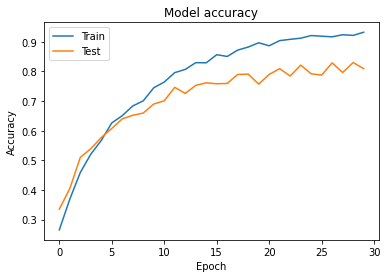

In [32]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### Loss Graph

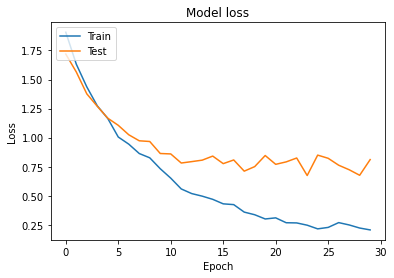

In [33]:
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()